In [1]:
from torch.utils.data import DataLoader
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import set_control_key_value
from spotPython.data.diabetes import Diabetes
from spotPython.light.regression.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control
from spotPython.hyperparameters.values import (
        get_default_hyperparameters_as_array, get_one_config_from_X)
from spotPython.hyperparameters.values import set_control_key_value
from spotPython.plot.xai import (get_activations, get_gradients, get_weights, plot_nn_values_hist, plot_nn_values_scatter, visualize_weights, visualize_gradients, visualize_activations, visualize_gradient_distributions, visualize_weights_distributions)
fun_control = fun_control_init(
    _L_in=10, # 10: diabetes
    _L_out=1,
    )
dataset = Diabetes()
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset,
                        replace=True)
add_core_model_to_fun_control(fun_control=fun_control,
                              core_model=NetLightRegression,
                              hyper_dict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
config = get_one_config_from_X(X, fun_control)
_L_in = fun_control["_L_in"]
_L_out = fun_control["_L_out"]
model = fun_control["core_model"](**config, _L_in=_L_in, _L_out=_L_out)
batch_size= config["batch_size"]
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

Seed set to 123
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.


In [2]:
get_activations(model, fun_control=fun_control, batch_size=batch_size, device = "cpu")

net: NetLightRegression(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=8, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.01, inplace=False)
    (3): Linear(in_features=8, out_features=4, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.01, inplace=False)
    (6): Linear(in_features=4, out_features=4, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.01, inplace=False)
    (9): Linear(in_features=4, out_features=2, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.01, inplace=False)
    (12): Linear(in_features=2, out_features=1, bias=True)
  )
)


{0: array([ 1.43207282e-01,  6.29711570e-03,  1.04200505e-01, -3.79187055e-03,
        -1.74976081e-01, -7.97475874e-02, -2.00860098e-01,  2.48444706e-01,
         1.42530382e-01, -2.86848284e-03,  3.61538306e-02, -5.21567464e-02,
        -2.15294853e-01, -1.26742452e-01, -1.79230243e-01,  2.73077637e-01,
         1.36738747e-01,  8.57899524e-03,  1.01677172e-01,  3.27537209e-03,
        -1.92429125e-01, -7.95854479e-02, -1.84092522e-01,  2.72164345e-01,
         1.51459932e-01,  3.70034464e-02,  4.94864471e-02, -6.36564493e-02,
        -1.63678646e-01, -1.26617596e-01, -2.05547154e-01,  2.25242034e-01,
         1.54910132e-01,  4.92911926e-03,  6.90693706e-02, -3.28048766e-02,
        -1.77523270e-01, -1.17699929e-01, -1.95609123e-01,  2.50784457e-01,
         1.66618377e-01,  1.22015905e-02,  2.58807391e-02, -8.16192627e-02,
        -2.00623482e-01, -1.17052861e-01, -1.86843857e-01,  2.40996480e-01,
         1.80479109e-01,  3.72159779e-02,  3.55244242e-02, -3.60636003e-02,
        -

In [3]:
get_gradients(model, fun_control=fun_control, batch_size=batch_size, device = "cpu")

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/spotPython/plot/xai.py:222: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(preds, targets)


{'layers.0.weight': array([ 0.10417588, -0.04161512,  0.10597267,  0.02180895,  0.12001498,
         0.02890352,  0.0114617 ,  0.08183316,  0.2495192 ,  0.5108763 ,
         0.14668094, -0.07902834,  0.00912531,  0.02640062,  0.14108546,
         0.06816655,  0.14256878, -0.00347906,  0.07373643,  0.23171762,
         0.08313342, -0.03320929,  0.08456727,  0.01740376,  0.09577317,
         0.02306532,  0.00914657,  0.06530368,  0.19911884,  0.40768448,
         0.04405227,  0.03805925,  0.015035  ,  0.0069457 ,  0.0094994 ,
         0.03021198, -0.01876849,  0.02160798, -0.03238906, -0.02050959,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        

In [4]:
get_weights(model)

{'Layer 0': array([-0.12895013,  0.01047492, -0.15705723,  0.11925378, -0.26944348,
         0.23180881, -0.22984707, -0.25141433, -0.19982024,  0.1432175 ,
        -0.11684369,  0.11833665, -0.2683918 , -0.19186287, -0.11611126,
        -0.06214499, -0.2412386 ,  0.20706299, -0.07457635,  0.10150522,
         0.22361842,  0.05891514,  0.08647272,  0.3052416 , -0.1426217 ,
         0.10016555, -0.14069483,  0.22599205,  0.25255737, -0.29155323,
         0.2699465 ,  0.1510033 ,  0.13780165,  0.13018301,  0.26287982,
        -0.04175457, -0.26743335, -0.09074122, -0.2227112 ,  0.02090478,
        -0.0590421 , -0.16961981, -0.02875188,  0.2995954 , -0.02494261,
         0.01004025, -0.04931906,  0.04971322,  0.28176293,  0.19337103,
         0.11224869,  0.06871963,  0.07456425,  0.12216929, -0.04086405,
        -0.29390487, -0.19555901,  0.26992753,  0.01890203, -0.25616774,
         0.04987782,  0.26129004, -0.29883513, -0.21289697, -0.12594265,
         0.0126926 , -0.07375361, -0.034

net: NetLightRegression(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=8, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.01, inplace=False)
    (3): Linear(in_features=8, out_features=4, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.01, inplace=False)
    (6): Linear(in_features=4, out_features=4, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.01, inplace=False)
    (9): Linear(in_features=4, out_features=2, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.01, inplace=False)
    (12): Linear(in_features=2, out_features=1, bias=True)
  )
)


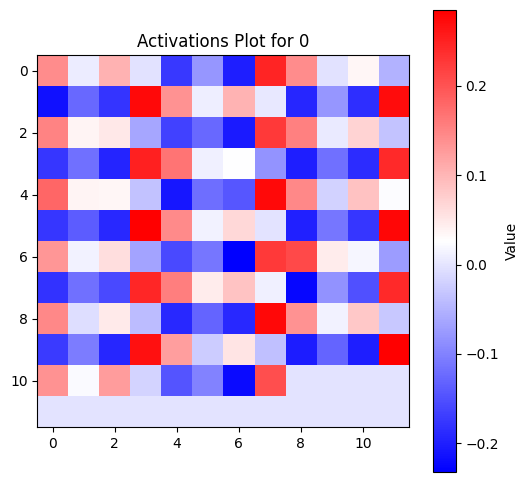

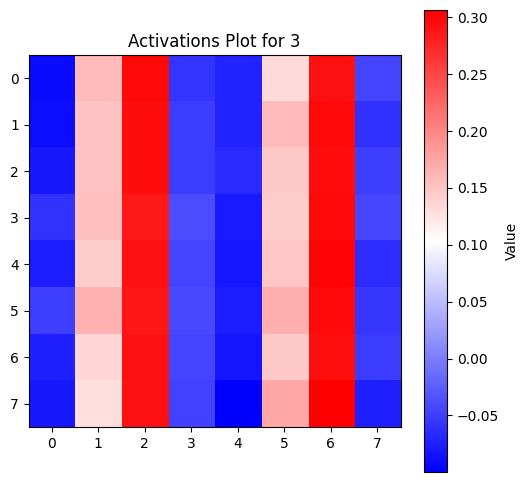

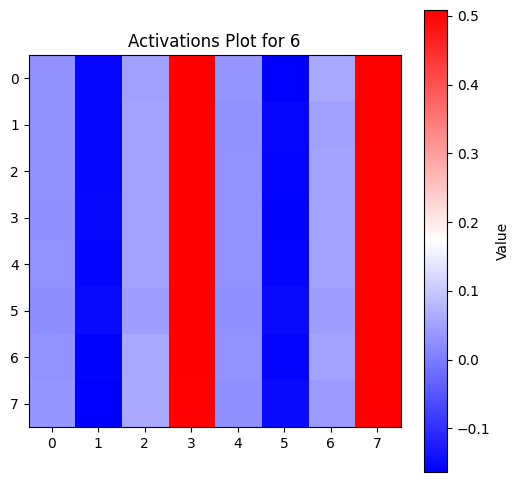

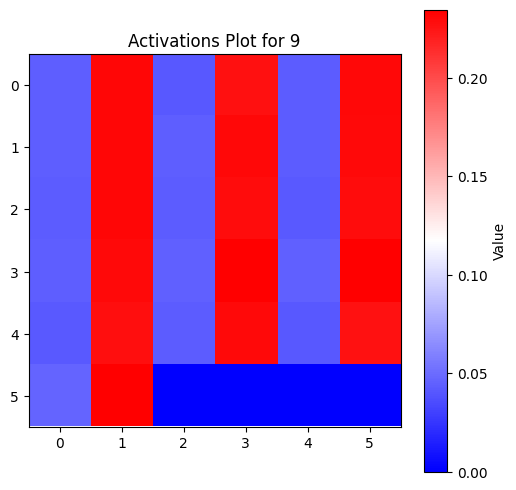

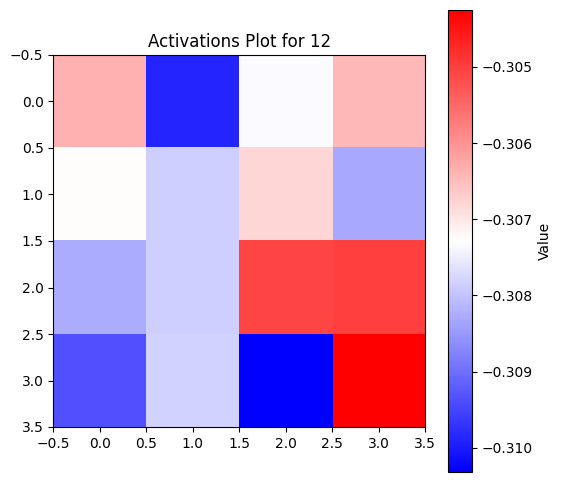

In [5]:
visualize_activations(model, fun_control=fun_control, batch_size=batch_size, device = "cpu", cmap="BlueWhiteRed", absolute=False)

n:5


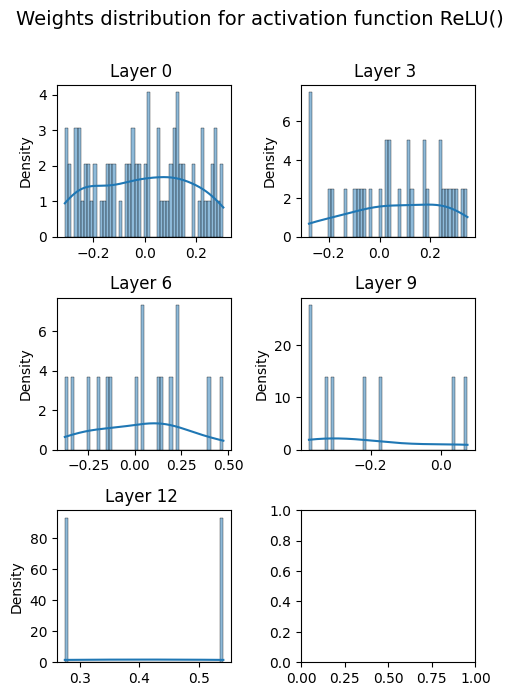

In [6]:
visualize_weights_distributions(model, color=f"C{0}")

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/spotPython/plot/xai.py:222: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(preds, targets)


n:5


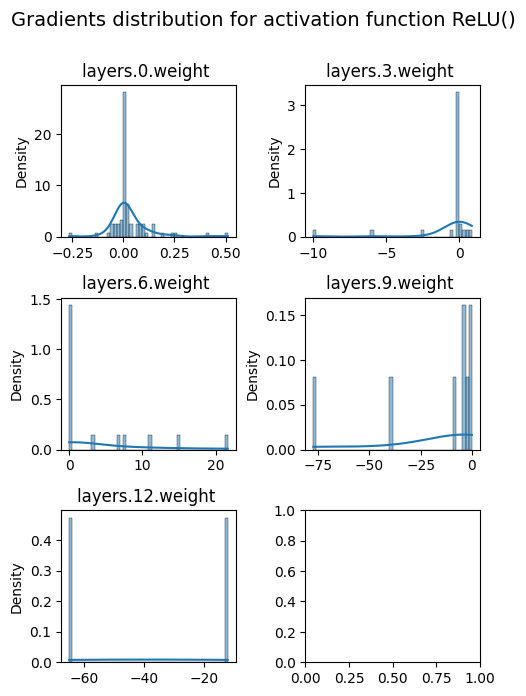

In [7]:
visualize_gradient_distributions(model, fun_control, batch_size=batch_size, color=f"C{0}")

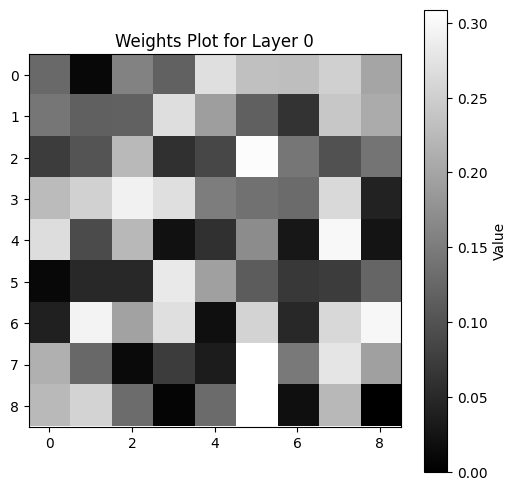

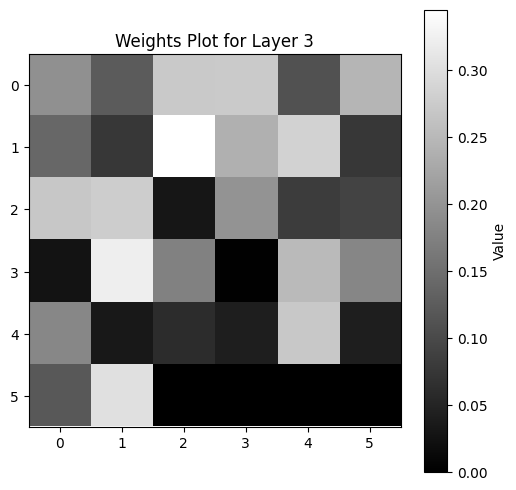

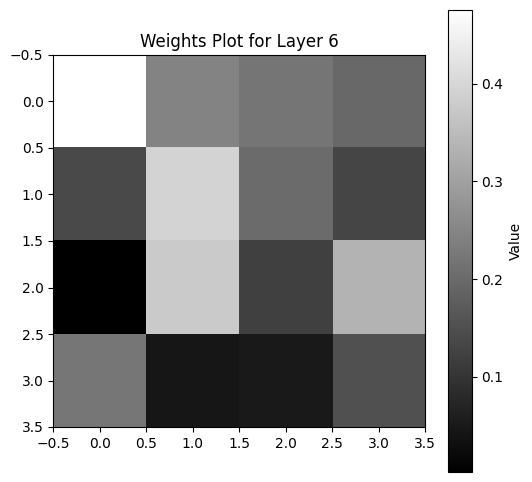

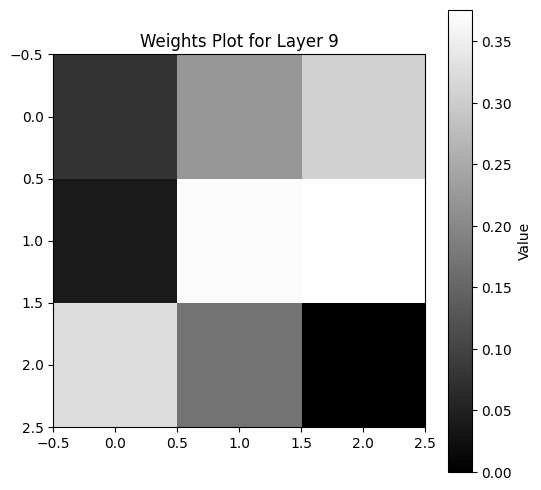

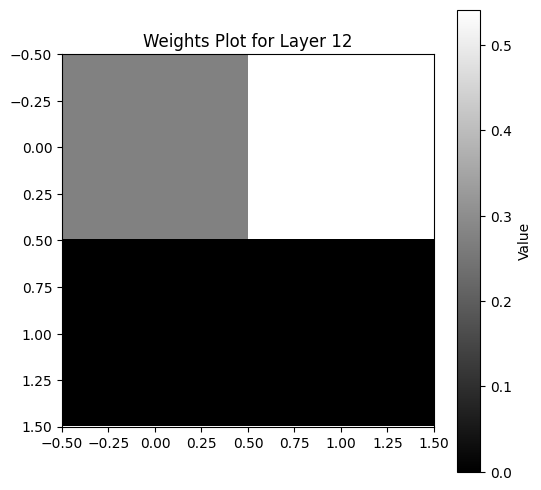

In [8]:
visualize_weights(model, absolute=True, cmap="gray", figsize=(6, 6))

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/spotPython/plot/xai.py:222: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(preds, targets)


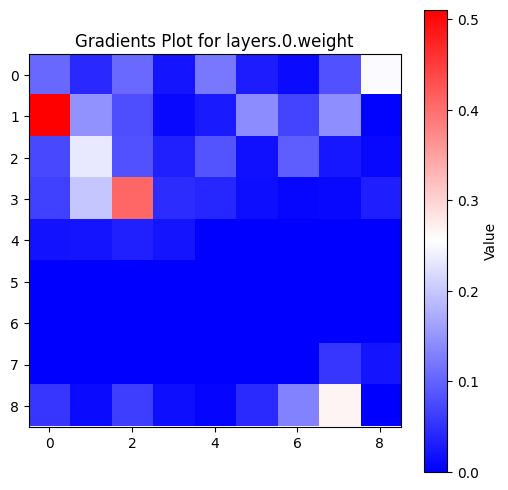

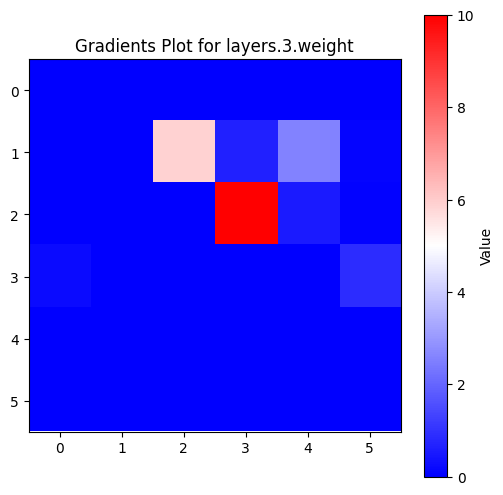

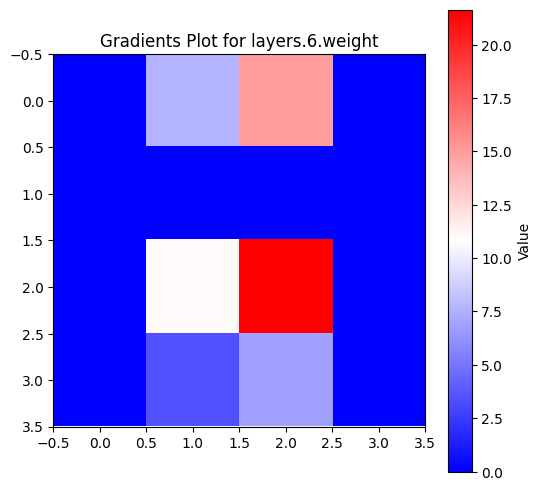

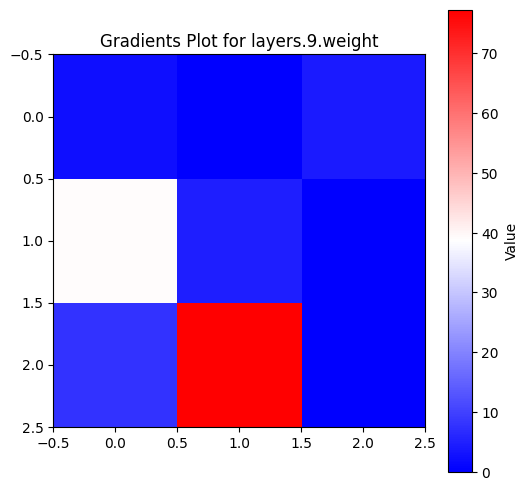

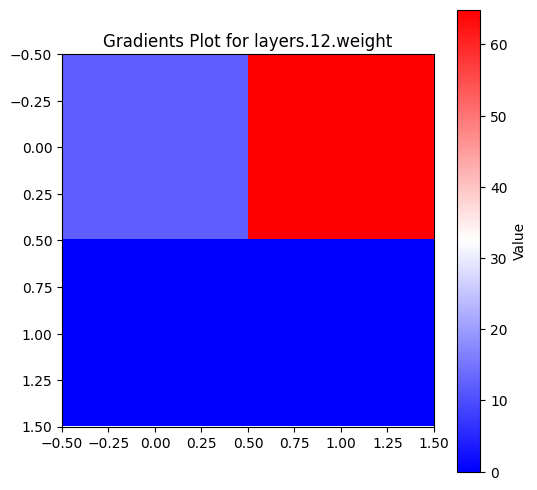

In [9]:
visualize_gradients(model, fun_control, batch_size, absolute=True, cmap="BlueWhiteRed", figsize=(6, 6))

net: NetLightRegression(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=8, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.01, inplace=False)
    (3): Linear(in_features=8, out_features=4, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.01, inplace=False)
    (6): Linear(in_features=4, out_features=4, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.01, inplace=False)
    (9): Linear(in_features=4, out_features=2, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.01, inplace=False)
    (12): Linear(in_features=2, out_features=1, bias=True)
  )
)


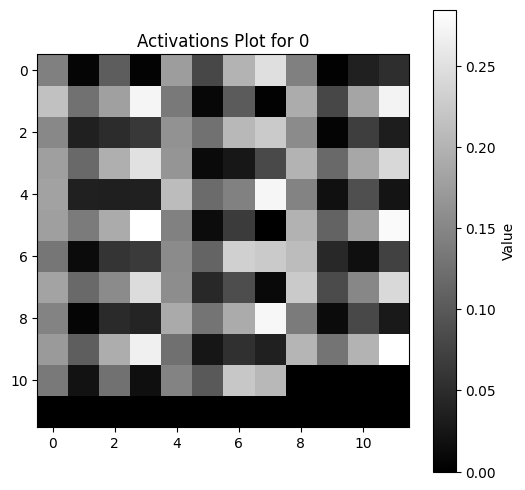

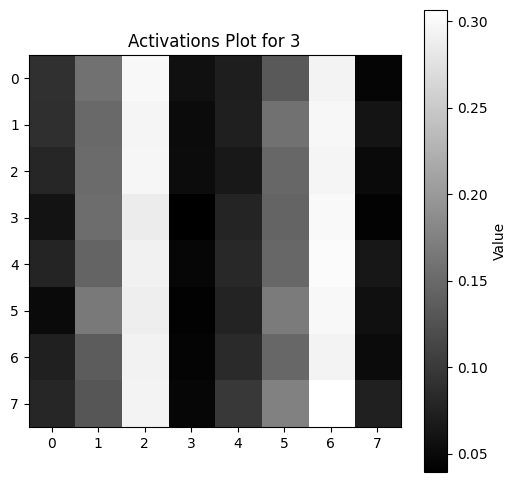

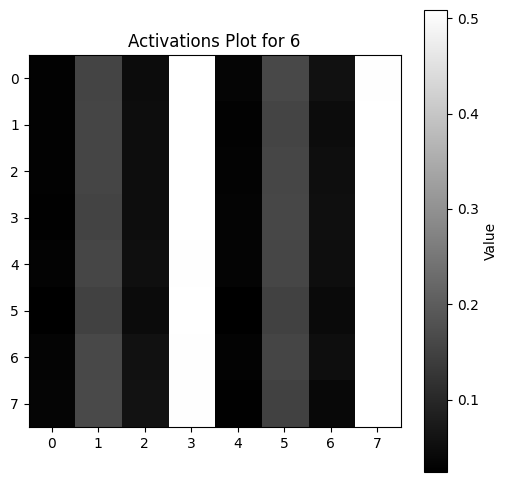

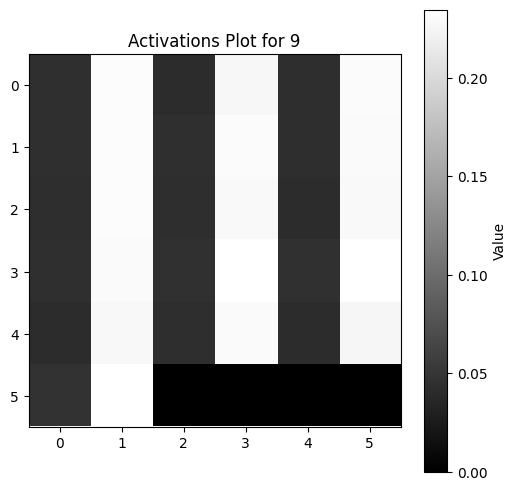

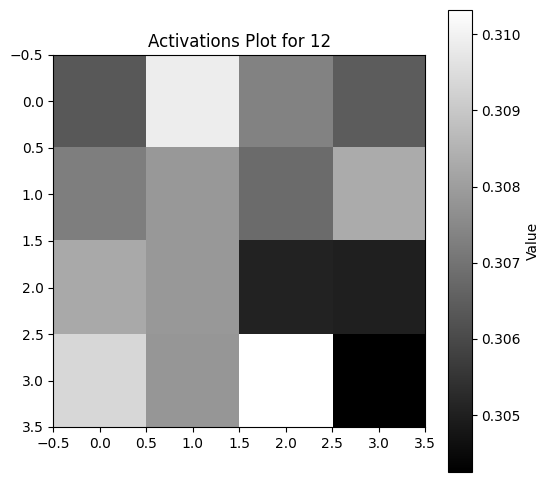

In [10]:
visualize_activations(model, fun_control=fun_control, batch_size=batch_size, device = "cpu")

net: NetLightRegression(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=8, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.01, inplace=False)
    (3): Linear(in_features=8, out_features=4, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.01, inplace=False)
    (6): Linear(in_features=4, out_features=4, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.01, inplace=False)
    (9): Linear(in_features=4, out_features=2, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.01, inplace=False)
    (12): Linear(in_features=2, out_features=1, bias=True)
  )
)


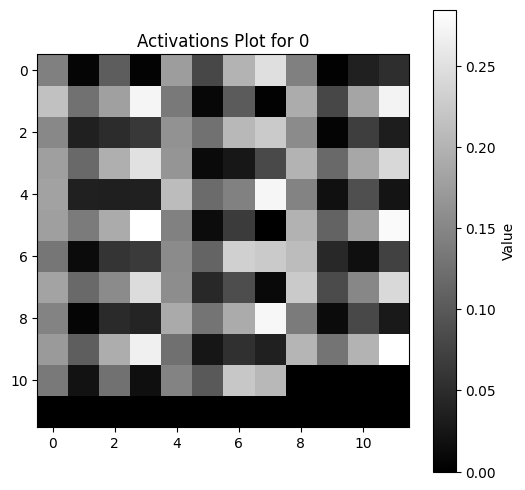

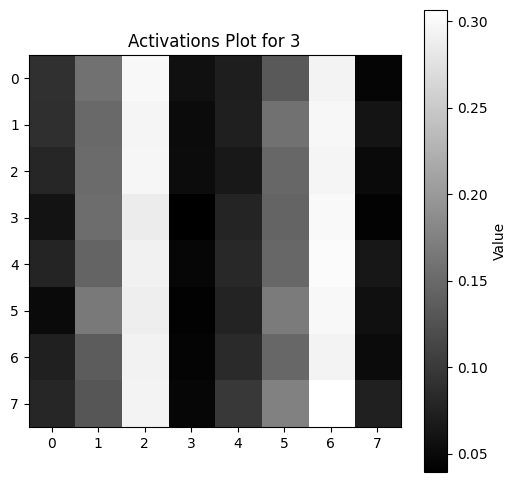

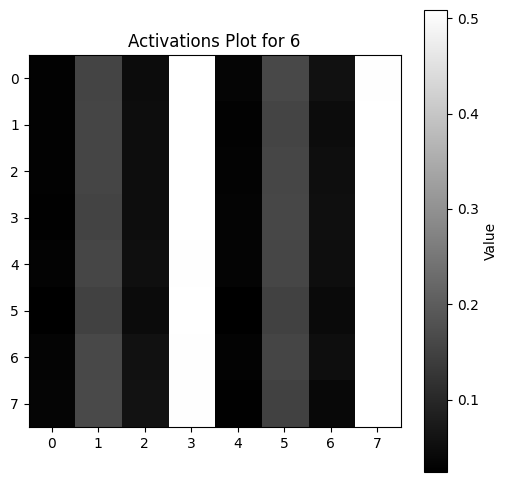

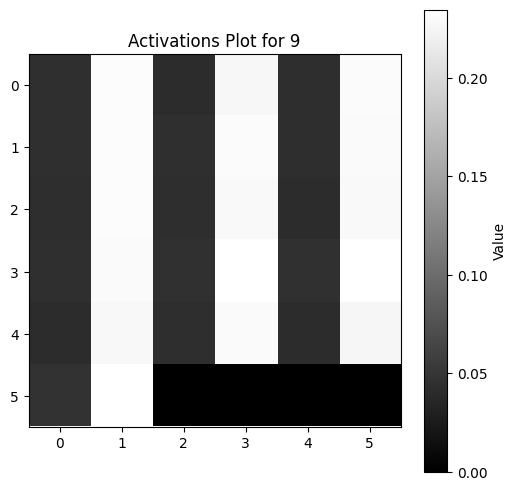

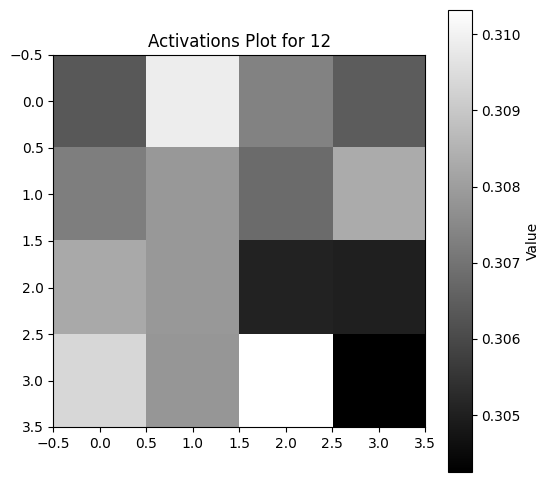

In [11]:
visualize_activations(model, fun_control=fun_control, batch_size=batch_size, device = "cpu")